In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [54]:
# ['Blood','Brain','Stomach', 'Skin','Nerve']
data_acc = {
    'y_retrained_spliceai_acceptor': [0.5718, 0.6361, 0.7705, 0.8122, 0.3356],
    'y_default_spliceai_acceptor': [0.6982, 0.7736, 0.7849, 0.8095, 0.5283],
    'y_ours_acceptor': [0.7075,0.7796,0.7804,0.8104,0.5820],
    ##
    'y_retrained_spliceai_donor': [0.5869, 0.6915, 0.8077, 0.8210, 0.2537],
    'y_default_spliceai_donor': [0.7034, 0.7725, 0.7839, 0.8099, 0.5391],
    'y_ours_donor': [0.7041,0.7778,0.7751,0.8109,0.5863]
}

data_prauc={
    'y_retrained_spliceai_acceptor': [0.5434, 0.6280, 0.7752, 0.8306, 0.3542],
    'y_default_spliceai_acceptor': [0.6942, 0.7712, 0.7837, 0.8119, 0.5231],
    'y_ours_acceptor': [0.7074,0.8144,0.8214,0.8545,0.5803],
    ##
    'y_retrained_spliceai_donor': [0.5518, 0.6848, 0.8049, 0.8384, 0.2889],
    'y_default_spliceai_donor': [0.7009, 0.7771, 0.7891, 0.8169, 0.5395],
    'y_ours_donor': [0.7163,0.8159,0.8138,0.8552,0.5803]
}

In [55]:
def getplot(y1,y2,y3,ax,xlabel='x',ylabel='y',x_len=5,tick_label=None):
    x = np.arange(x_len)
    y_Rsp = y1.copy()
    y_Dsp = y2.copy()
    y_ours = y3.copy()
    bar_width = 0.28
    if tick_label is None:
        tick_label = ['Blood','Brain','Stomach', 'Skin','Nerve']
    p1=ax.bar(x,y_Rsp,bar_width,align='center',color='red',label='Retrained SpliceAI',alpha=0.5)
    ax.bar_label(p1)
    p2=ax.bar(x+bar_width,y_Dsp,bar_width,align='center',color='yellow',label='Default SpliceAI',alpha=0.5)
    ax.bar_label(p2)
    p3=ax.bar(x+2*bar_width,y_ours,bar_width,align='center',color='green',label='Ours',alpha=0.5)
    ax.bar_label(p3)
    # ax1.xticks(x+bar_width/2, tick_label)
    fontx={'size':12}
    ax.set_xlabel(xlabel,fontdict=fontx)
    fonty={'size':15}
    ax.set_ylabel(ylabel,fontdict=fonty)
    ax.set_xticks(x+bar_width, tick_label,size=13)
    ax.legend()

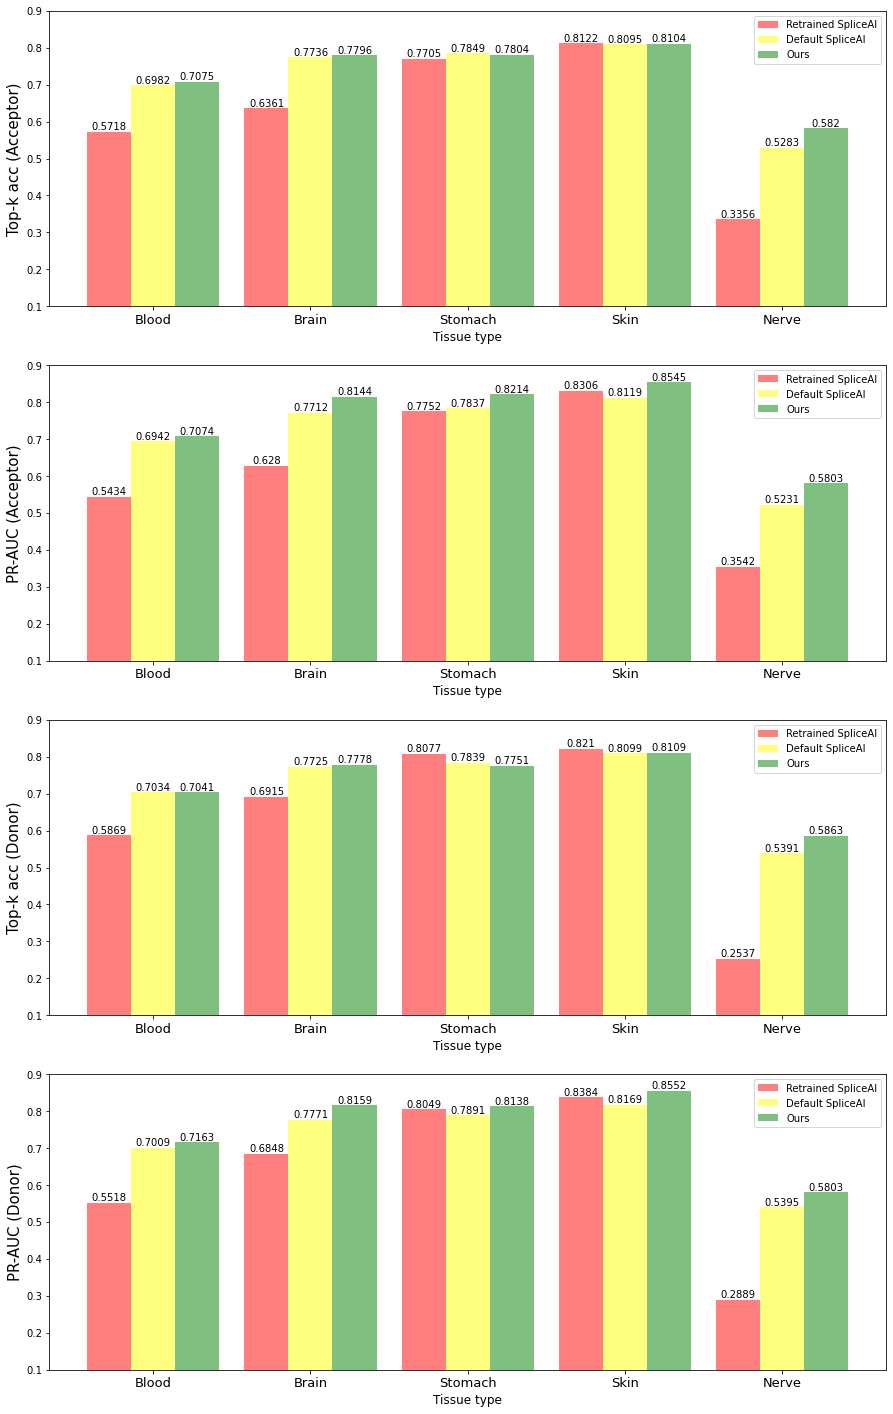

In [57]:
fig = plt.figure(figsize=(15,25))
### acceptor
ax1 = plt.subplot(4,1,1)
y_Rsp = data_acc['y_retrained_spliceai_acceptor']
y_Dsp = data_acc['y_default_spliceai_acceptor']
y_ours = data_acc['y_ours_acceptor']
getplot(y_Rsp,y_Dsp,y_ours,ax1,xlabel="Tissue type",ylabel="Top-k acc (Acceptor)")
plt.ylim(0.1,0.9)
ax3 = plt.subplot(4,1,2)
y_Rsp = data_prauc['y_retrained_spliceai_acceptor']
y_Dsp = data_prauc['y_default_spliceai_acceptor']
y_ours = data_prauc['y_ours_acceptor']
getplot(y_Rsp,y_Dsp,y_ours,ax3,xlabel="Tissue type",ylabel="PR-AUC (Acceptor)")
plt.ylim(0.1,0.9)
### donor
ax2 = plt.subplot(4,1,3)
y_Rsp = data_acc['y_retrained_spliceai_donor']
y_Dsp = data_acc['y_default_spliceai_donor']
y_ours = data_acc['y_ours_donor']
getplot(y_Rsp,y_Dsp,y_ours,ax2,xlabel="Tissue type",ylabel="Top-k acc (Donor)")
plt.ylim(0.1,0.9)
###
ax4 = plt.subplot(4,1,4)
y_Rsp = data_prauc['y_retrained_spliceai_donor']
y_Dsp = data_prauc['y_default_spliceai_donor']
y_ours = data_prauc['y_ours_donor']
getplot(y_Rsp,y_Dsp,y_ours,ax4,xlabel="Tissue type",ylabel="PR-AUC (Donor)")
plt.ylim(0.1,0.9)
plt.show()
fig.savefig('fig1.jpg')

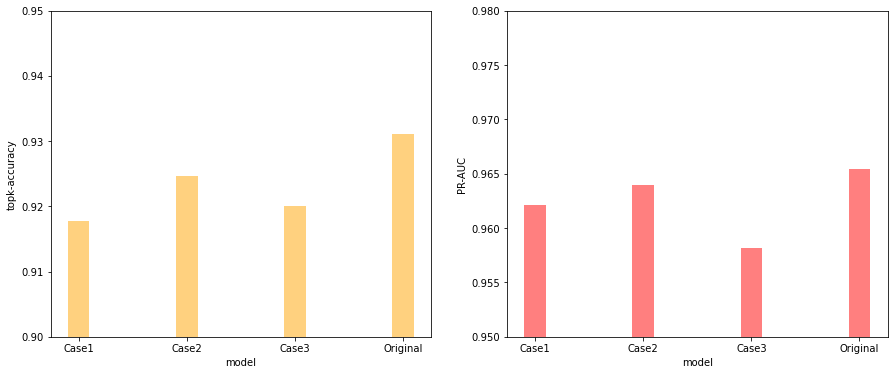

In [46]:
flag=True
y_acc = [0.9178,0.9247,0.9201,0.9311]
y_prauc=[0.9621,0.9640,0.9582,0.9654]
if flag:
    tick_label = ['Case1','Case2','Case3','Original']
    fig = plt.figure(figsize=(15,6))
    ax1 = plt.subplot(1,2,1)
    x = np.arange(4)
    # case1, case2, case3, original
    bar_width = 0.2
    tick_label = ['Case1', 'Case2', 'Case3','Original']
    plt.ylim(0.9,0.95)
    p1=ax1.bar(x,y_acc,bar_width,align='center',color='orange',alpha=0.5)
    # ax1.bar_label(p1)
    ax1.set_xlabel('model')
    ax1.set_ylabel('topk-accuracy')
    ax1.set_xticks(x, tick_label)
    #
    ax2 = plt.subplot(1,2,2)
    plt.ylim(0.95,0.98)
    p2=ax2.bar(x,y_prauc,bar_width,align='center',color='red',alpha=0.5)
    ax2.set_xlabel('model')
    ax2.set_ylabel('PR-AUC')
    ax2.set_xticks(x, tick_label)
    plt.show()

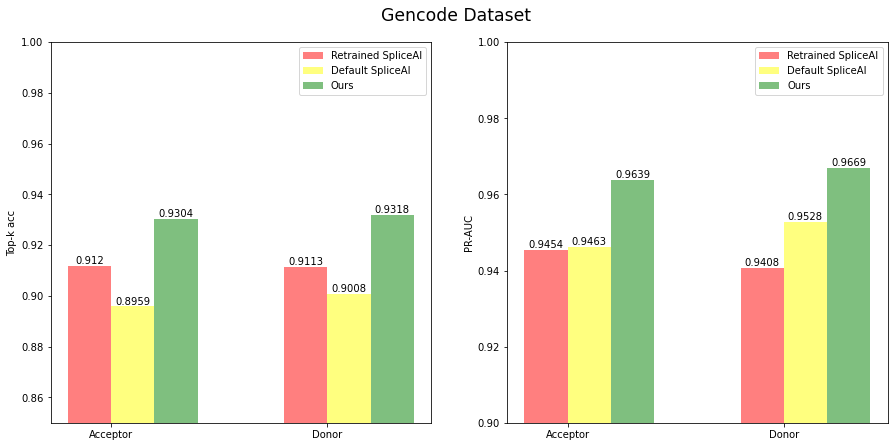

In [72]:
flag=True
if flag:
    fig = plt.figure(figsize=(15,7))
    plt.suptitle('Gencode Dataset',y=0.95,fontsize='xx-large')
    ### acceptor donor
    ax1 = plt.subplot(1,2,1)
    y_Rsp = [0.912,0.9113]
    y_Dsp = [0.8959,0.9008]
    y_ours = [0.9304,0.9318]
    plt.ylim(0.85,1)
    getplot(y_Rsp,y_Dsp,y_ours,ax1,xlabel="",ylabel="Top-k acc",x_len=2,tick_label=['Acceptor','Donor'])
    ###
    ax2 = plt.subplot(1,2,2)
    y_Rsp = [0.9454,0.9408]
    y_Dsp = [0.9463,0.9528]
    y_ours = [0.9639,0.9669]
    plt.ylim(0.9,1)
    getplot(y_Rsp,y_Dsp,y_ours,ax2,xlabel="",ylabel="PR-AUC",x_len=2,tick_label=['Acceptor','Donor'])
    plt.show()

## clinvar score

In [33]:
import vcf
import pandas as pd
import argparse
import numpy as np
def calc_predication(result_vcf,mode='new'):
    vcf_reader = vcf.Reader(filename=result_vcf,encoding='utf8')
    score_list = []
    for record in vcf_reader:
        # CHROM, POS, ID, REF, ALT
        chrom = record.CHROM
        pos = record.POS
        id = record.ID
        ref = record.REF
        alt = record.ALT
        score = ''
        # if 'missense_variant' in record.INFO['MC'][0]:
        #     continue
        if mode=='spliceai':
            if 'SpliceAI' not in record.INFO:
                continue
            mxscore=-1
            for score in record.INFO['SpliceAI']:
                score = score.split(sep='|')[2:6]
                score = [float(x) for x in score]
                mxscore = np.max([mxscore,np.max(score)])
            score_list.append(mxscore)
        else:
            mxscore=-1
            for k in record.INFO.keys():
                if record.INFO[k] == True:
                    score = k
                    score = score.split(sep='|')[2:6]
                    score = [float(x) for x in score]
                    mxscore = np.max([mxscore,np.max(score)])
                    # print(k)
            if score == '':
                continue
            score_list.append(mxscore)

        
    return score_list

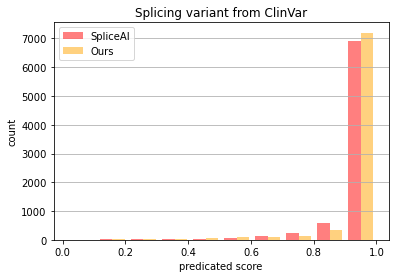

In [4]:
# score1 = calc_predication('clinvar_pred/spliceai_result_false.vcf',mode='spliceai')
# score2 = calc_predication('clinvar_pred/output_2false.vcf')
score1 = calc_predication('clinvar_pred/spliceai_result.vcf',mode='spliceai')
score2 = calc_predication('clinvar_pred/output2_1000.vcf')
# score3 = calc_predication('clinvar_pred/splice_result.vcf')
fig = plt.figure()
p2 = plt.hist(np.array([score1,score2]).transpose(),bins=10,density=False,color=['red','orange'],alpha=0.5,label=['SpliceAI','Ours'])
plt.legend(prop ={'size':10}) 

# ytick=np.arange(0,10,1)
# plt.yticks(ytick)
plt.title("Splicing variant from ClinVar")
plt.ylabel("count")
plt.xlabel("predicated score")
plt.grid(axis='y')
plt.show()

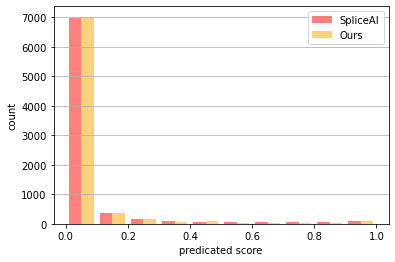

In [67]:
score1 = calc_predication('clinvar_pred/spliceai_result_false.vcf',mode='spliceai')
score2 = calc_predication('clinvar_pred/output_March_false.vcf')
# score3 = calc_predication('clinvar_pred/splice_result.vcf')
fig = plt.figure()
p2 = plt.hist(np.array([score1,score2]).transpose(),bins=10,density=False,color=['red','orange'],alpha=0.5,label=['SpliceAI','Ours'])
plt.legend(prop ={'size':10}) 

# ytick=np.arange(0,10,1)
# plt.yticks(ytick)
plt.title("")
plt.ylabel("count")
plt.xlabel("predicated score")
plt.grid(axis='y')
plt.show()

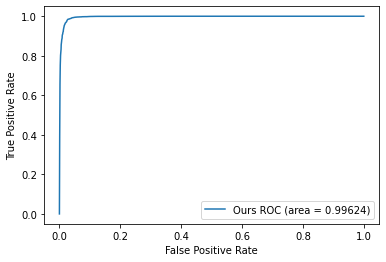

In [50]:
from sklearn.metrics import roc_curve,auc
score1_true = calc_predication('clinvar_pred/spliceai_result.vcf',mode='spliceai')
score1_false = calc_predication('clinvar_pred/spliceai_result_false.vcf',mode='spliceai')
score2_true = calc_predication('clinvar_pred/output2_1000.vcf')
score2_false = calc_predication('clinvar_pred/output_March_false.vcf')
pred = np.array(score2_true + score2_false)
label = np.hstack([np.ones(len(score2_true)),np.zeros(len(score2_false))])
fpr,tpr,thres = roc_curve(label,pred)
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='Ours ROC (area = {0:.5f})'.format(roc_auc))
#
pred1 = np.array(score1_true + score1_false)
label1 = np.hstack([np.ones(len(score1_true)),np.zeros(len(score1_false))])
fpr1,tpr1,thres1 = roc_curve(label1,pred1)
roc_auc1 = auc(fpr1,tpr1)
# plt.plot(fpr1,tpr1,'k--',label='SpliceAI ROC (area = {0:.5f})'.format(roc_auc1))
plt.legend(loc="lower right")
plt.show()



In [51]:
score1_false = calc_predication('clinvar_pred/spliceai_result_false.vcf',mode='spliceai')
score2_false = calc_predication('clinvar_pred/output_March_false.vcf')
score1_false = np.array(score1_false)
score2_false = np.array(score2_false)
print(np.where((score2_false>0.5)&(score1_false<0.3)))
print(score1_false[np.where((score2_false>0.5)&(score1_false<0.3))])
# print(np.where((score2_false>0.3)&(score1_false<0.1)))
# print(np.where((score2_false<0.1)&(score1_false>0.3)))


(array([ 279,  812, 7070, 7785, 7944], dtype=int64),)
[0.23 0.26 0.28 0.29 0.28]


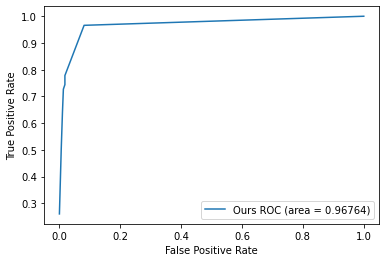

In [15]:
from sklearn.metrics import roc_curve,auc
# pred = np.loadtxt('roc_data/pred.txt')
# true = np.loadtxt('roc_data/true.txt')
fpr = [0.001,0.007,0.011,0.014,0.019,0.019,0.082,1]
tpr = [0.26,0.504,0.641,0.727,0.744,0.778,0.966,1]
# fpr,tpr,thres = roc_curve(true,pred)
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='Ours ROC (area = {0:.5f})'.format(roc_auc))
plt.legend(loc="lower right")

In [17]:
from sklearn.metrics import average_precision_score
def get_topl_statistics(y_true, y_pred):
    # Prints the following information: top-kL statistics for k=0.5,1,2,4,
    # auprc, thresholds for k=0.5,1,2,4, number of true splice sites.
    idx_true = np.nonzero(y_true == 1)[0]
    argsorted_y_pred = np.argsort(y_pred)
    # sorted_y_pred = np.sort(y_pred)
    sorted_y_pred = y_pred[argsorted_y_pred]

    topkl_accuracy = []
    threshold = []

    for top_length in [0.5, 1, 2]:
        # for top_length in [0.5, 1, 2, 4]:

        idx_pred = argsorted_y_pred[-int(top_length * len(idx_true)):]
        # mod
        if len(idx_true) > 0:
            topkl_accuracy += [np.size(np.intersect1d(idx_true, idx_pred))
                               / float(min(len(idx_pred), len(idx_true)))]
            threshold += [sorted_y_pred[-int(top_length * len(idx_true))]]
        else:
            print('zero true')
            topkl_accuracy += [1]
            threshold += [0]

    auprc = 1
    if len(idx_true) > 0:
        auprc = average_precision_score(y_true, y_pred)

    # print(("%.4f\t\033[91m%.4f\t\033[0m%.4f\t%.4f\t\033[94m%.4f\t\033[0m"
    #       + "%.4f\t%.4f\t%.4f\t%.4f\t%d") % (
    #     topkl_accuracy[0], topkl_accuracy[1], topkl_accuracy[2],
    #     topkl_accuracy[3], auprc, threshold[0], threshold[1],
    #     threshold[2], threshold[3], len(idx_true)))

    return topkl_accuracy, threshold, auprc, len(idx_true)


1652
(78390607,)
(78390607,)
stat:
[0.16531354983202687, 0.13695849954510464, 0.20316327244733712]
0.03841924200773524
14289


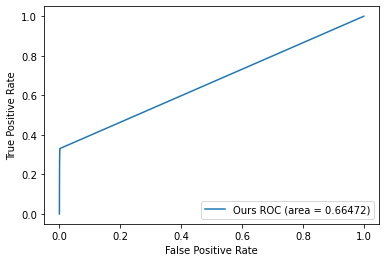

In [47]:
# fin = open('NNsplice1.txt','r')
label = np.load('NNSplice/seqdatalabel.npy',allow_pickle=True)
pred = np.load('NNSplice/seqdatapred_do.npy',allow_pickle=True)
print(len(pred))
# y_true = np.array(label[0],copy=True)
# y_pred = np.array(pred[0],copy=True)
y_true = np.hstack(label[:1652])
y_pred = np.hstack(pred)
y_pred = np.roll(y_pred,-2)
# print(np.where(y_true[0]==2))
# print(np.where(y_pred>0))
y_true[y_true==1]=0
y_true[y_true==2]=1
print(y_true.shape)
print(y_pred.shape)
fpr,tpr,thres = roc_curve(y_true,y_pred)
stat = get_topl_statistics(y_true,y_pred)
print('stat:')
print(stat[0])
print(stat[2])
print(stat[3])
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='Ours ROC (area = {0:.5f})'.format(roc_auc))
plt.legend(loc="lower right")